# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split





**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [3]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df.columns = [i.strip('(cm) ') for i in iris_data.feature_names]
    df['target']=iris_data.target
    df['class'] =iris_data.target_names[iris_data.target]
    return df
    
    # YOUR CODE HERE
    
df_iris = create_df()
df_iris.sample(n=10)


,sepal length,sepal width,petal length,petal width,target,class
66,5.6,3.0,4.5,1.5,1,versicolor
6,4.6,3.4,1.4,0.3,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
56,6.3,3.3,4.7,1.6,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor
60,5.0,2.0,3.5,1.0,1,versicolor
110,6.5,3.2,5.1,2.0,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
145,6.7,3.0,5.2,2.3,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica


In [4]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [5]:
varieties = list(df_iris['target'])

In [6]:

#From our data we will only get variable columns as np.array
x = df_iris.drop(['target','class'],axis=1).values
# YOUR CODE HERE


In [7]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [8]:
samples = x

In [9]:
mergings = linkage(samples,method='complete')



In [10]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

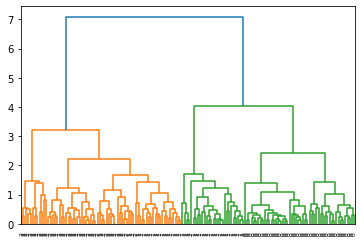

In [11]:
dn = dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=6)


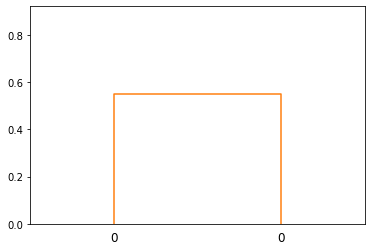

In [12]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [13]:
from sklearn.cluster import KMeans

df = pd.read_csv('../datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('../datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [15]:
model = KMeans(n_clusters=3)


In [17]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [19]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [20]:
labels = model.predict(points)

In [21]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [30]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for label in labels:
        if label == 0:
            data_0.append(label)
        elif label== 1:
            data_1.append(label)
        elif label == 2:
            data_2.append(label)

            

 

    # YOUR CODE HERE

    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94,)
(95,)
(111,)


In [31]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

In [58]:
# plotting the data 





**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [36]:

# YOUR CODE HERE
new_labels = model.predict(new_points)


In [37]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [46]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []


for label in new_labels:
    if label == 0:
        new_0.append(label)
    elif label== 1:
        new_1.append(label)
    elif label == 2:
        new_2.append(label)
new_0 =np.array(new_0)
new_1 =np.array(new_1)
new_2 =np.array(new_2)

In [44]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

In [51]:
#plot the new labels


# YOUR CODE HERE


In [ ]:
#plot all the points together

# YOUR CODE HERE
raise NotImplementedError()